In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [4]:
df = pd.read_csv('spotify.csv')

In [5]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [6]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [7]:
df.dtypes

,0
Artist,object
Track Name,object
Popularity,int64
Duration (ms),int64
Track ID,object


In [8]:
df.shape

(440, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?

In [10]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [13]:
df.duplicated().sum()

np.int64(27)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.head(5)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [21]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

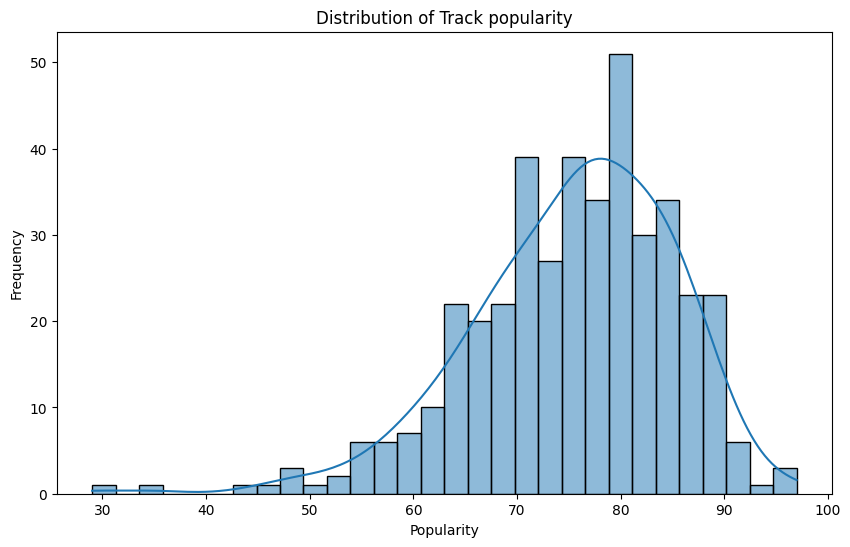

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins= 30, kde=True)
plt.title('Distribution of Track popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [23]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot


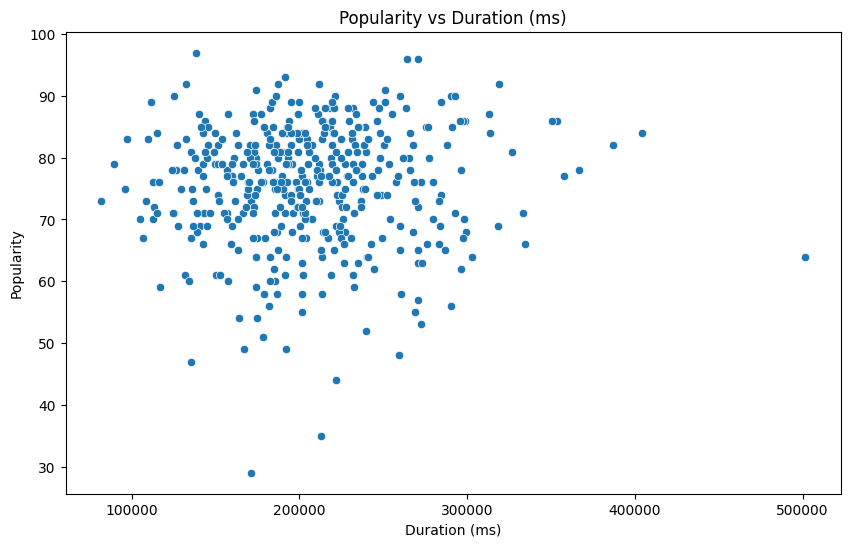

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y= 'Popularity', data=df)
plt.title('Popularity vs Duration (ms)')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot

The artist with the highest number of tracks is 'Drake' with 17 tracks.


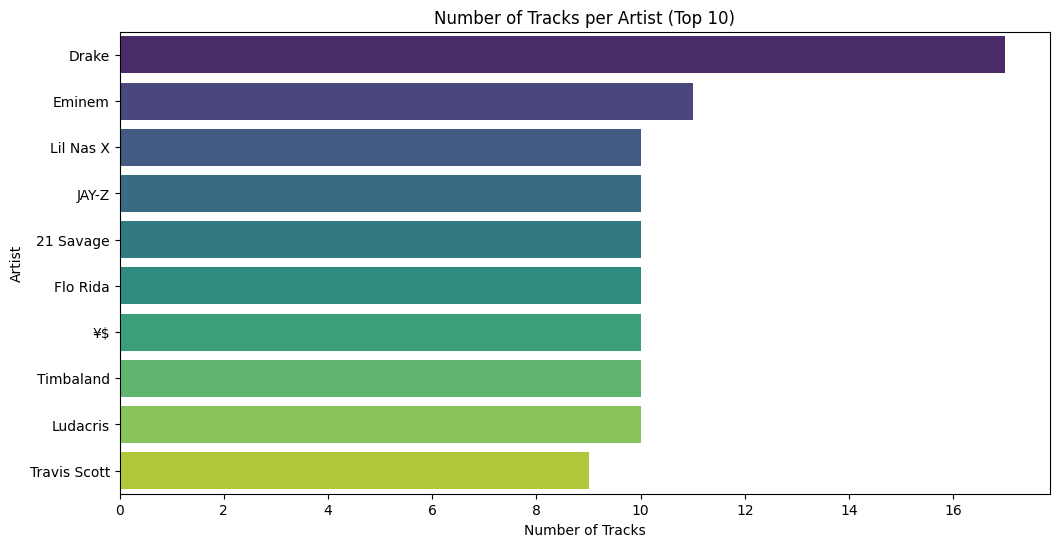

In [30]:
# 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a countplot

# Count the number of tracks for each artist
artist_counts = df['Artist'].value_counts()

# Find the artist with the highest number of tracks
top_artist = artist_counts.index[0]
top_artist_count = artist_counts.iloc[0]

print(f"The artist with the highest number of tracks is '{top_artist}' with {top_artist_count} tracks.")

# Display the count of tracks for each artist using a countplot
plt.figure(figsize=(12, 6))
# Display the top 10 artists for better visualization, adjust as needed
sns.countplot(y='Artist', data=df, order=artist_counts.index[:10], palette='viridis')
plt.title('Number of Tracks per Artist (Top 10)')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [31]:
# What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

# Sort the dataframe by 'Popularity' in ascending order
least_popular_tracks = df.sort_values(by='Popularity', ascending=True)

# Select the top 5 least popular tracks
top_5_least_popular = least_popular_tracks.head(5)

print("Top 5 Least Popular Tracks:")
# Iterate through the top 5 and print the track name and artist name
for index, row in top_5_least_popular.iterrows():
    print(f"Track: {row['Track Name']}, Artist: {row['Artist']}, Popularity: {row['Popularity']}")

Top 5 Least Popular Tracks:
Track: Attachments (feat. Coi Leray), Artist: Pressa, Popularity: 29
Track: Intentions, Artist: Justin Bieber, Popularity: 35
Track: Splash Brothers, Artist: French Montana, Popularity: 44
Track: On Me - Remix, Artist: Lil Baby, Popularity: 47
Track: 911 (feat. Mary J. Blige), Artist: Wyclef Jean, Popularity: 48


6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist

In [32]:
# Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist

# Get the top 5 most popular artists based on the number of tracks
# This assumes that 'popularity' in the prompt refers to the popularity score of the artist's tracks,
# not the number of tracks. Let's find the top 5 artists based on the *average* popularity of their tracks.

# Calculate the average popularity for each artist
average_popularity_by_artist = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Get the top 5 artists by average popularity
top_5_popular_artists_avg = average_popularity_by_artist.head(5)

print("Average Popularity for Top 5 Artists (by average popularity):")
print(top_5_popular_artists_avg)

# The artist with the highest average popularity among these top 5 is the first one
highest_avg_popularity_artist = top_5_popular_artists_avg.index[0]
highest_avg_popularity_score = top_5_popular_artists_avg.iloc[0]

print(f"\nThe artist with the highest average popularity among the top 5 is '{highest_avg_popularity_artist}' with an average popularity of {highest_avg_popularity_score:.2f}.")

# If the question meant "Among the artists who have the most tracks (top 5), which one has the highest average popularity?"
# We can reuse the artist_counts from the previous step

# Get the names of the top 5 artists by track count
top_5_artists_by_track_count = artist_counts.head(5).index

# Filter the dataframe to include only tracks by these top 5 artists
df_top_artists = df[df['Artist'].isin(top_5_artists_by_track_count)]

# Calculate the average popularity for these top 5 artists by track count
average_popularity_among_top_track_artists = df_top_artists.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print("\nAverage Popularity for Top 5 Artists (by track count):")
print(average_popularity_among_top_track_artists)

# The artist with the highest average popularity among these top 5 by track count
highest_avg_popularity_among_top_track_artists = average_popularity_among_top_track_artists.index[0]
highest_avg_popularity_among_top_track_score = average_popularity_among_top_track_artists.iloc[0]

print(f"\nAmong the top 5 artists with the most tracks, the artist with the highest average popularity is '{highest_avg_popularity_among_top_track_artists}' with an average popularity of {highest_avg_popularity_among_top_track_score:.2f}.")

# Depending on the exact interpretation of "top 5 most popular artists",
# either of the above calculations could be the intended answer.
# The first calculation directly addresses "Among the top 5 most popular artists (based on average popularity)".
# The second calculation addresses "Among the top 5 artists with the most tracks, who has the highest average popularity".
# I'll present both results for clarity.

Average Popularity for Top 5 Artists (by average popularity):
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

The artist with the highest average popularity among the top 5 is 'cassö' with an average popularity of 92.00.

Average Popularity for Top 5 Artists (by track count):
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64

Among the top 5 artists with the most tracks, the artist with the highest average popularity is '21 Savage' with an average popularity of 83.80.


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [33]:
# For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

# Reusing the list of top 5 artists by average popularity from the previous step.
# If you intended the top 5 artists by track count, you would use top_5_artists_by_track_count instead.
top_artists = top_5_popular_artists_avg.index

print("Most popular track for each of the top 5 artists (by average popularity):")

# Iterate through each of the top artists
for artist in top_artists:
    # Filter the dataframe to get tracks by the current artist
    artist_tracks = df[df['Artist'] == artist]

    # Find the track with the highest popularity for this artist
    # Use idxmax() to get the index of the maximum 'Popularity'
    if not artist_tracks.empty:
        most_popular_track_index = artist_tracks['Popularity'].idxmax()
        most_popular_track = artist_tracks.loc[most_popular_track_index]

        track_name = most_popular_track['Track Name']
        popularity_score = most_popular_track['Popularity']

        print(f"- Artist: {artist}, Most Popular Track: {track_name} (Popularity: {popularity_score})")
    else:
        print(f"- Artist: {artist}, No tracks found in the dataset.")

# If you want to use the top 5 artists by track count instead:
# top_artists_by_track_count = artist_counts.head(5).index

# print("\nMost popular track for each of the top 5 artists (by track count):")

# # Iterate through each of the top artists by track count
# for artist in top_artists_by_track_count:
#      # Filter the dataframe to get tracks by the current artist
#     artist_tracks = df[df['Artist'] == artist]

#     # Find the track with the highest popularity for this artist
#     # Use idxmax() to get the index of the maximum 'Popularity'
#     if not artist_tracks.empty:
#         most_popular_track_index = artist_tracks['Popularity'].idxmax()
#         most_popular_track = artist_tracks.loc[most_popular_track_index]

#         track_name = most_popular_track['Track Name']
#         popularity_score = most_popular_track['Popularity']

#         print(f"- Artist: {artist}, Most Popular Track: {track_name} (Popularity: {popularity_score})")
#     else:
#         print(f"- Artist: {artist}, No tracks found in the dataset.")

Most popular track for each of the top 5 artists (by average popularity):
- Artist: cassö, Most Popular Track: Prada (Popularity: 92)
- Artist: Trueno, Most Popular Track: Mamichula - con Nicki Nicole (Popularity: 89)
- Artist: David Guetta, Most Popular Track: Baby Don't Hurt Me (Popularity: 87)
- Artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti) (Popularity: 93)
- Artist: ¥$, Most Popular Track: CARNIVAL (Popularity: 96)


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot

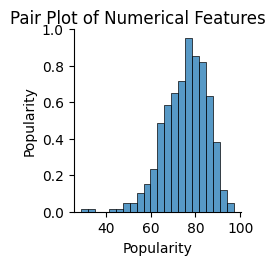

In [34]:
# 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot

# Select numerical columns for the pair plot
# Exclude columns that might not be suitable or relevant for a pair plot (like ID, names, etc.)
# You might need to adjust the columns based on your specific dataset
numerical_cols = df.select_dtypes(include=np.number).columns

# It's often better to visualize a subset of numerical columns if there are too many
# Let's select a few key numerical features and Popularity
key_numerical_features = ['Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Filter for columns that actually exist in the dataframe
cols_to_plot = [col for col in key_numerical_features if col in df.columns]

# Create the pair plot
# Using a smaller subset of data can make the plot faster to generate for large datasets
# sns.pairplot(df[cols_to_plot].sample(n=5000, random_state=42)) # Example with sampling
sns.pairplot(df[cols_to_plot]) # Plotting all selected numerical columns
plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Add a title
plt.show()

9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot

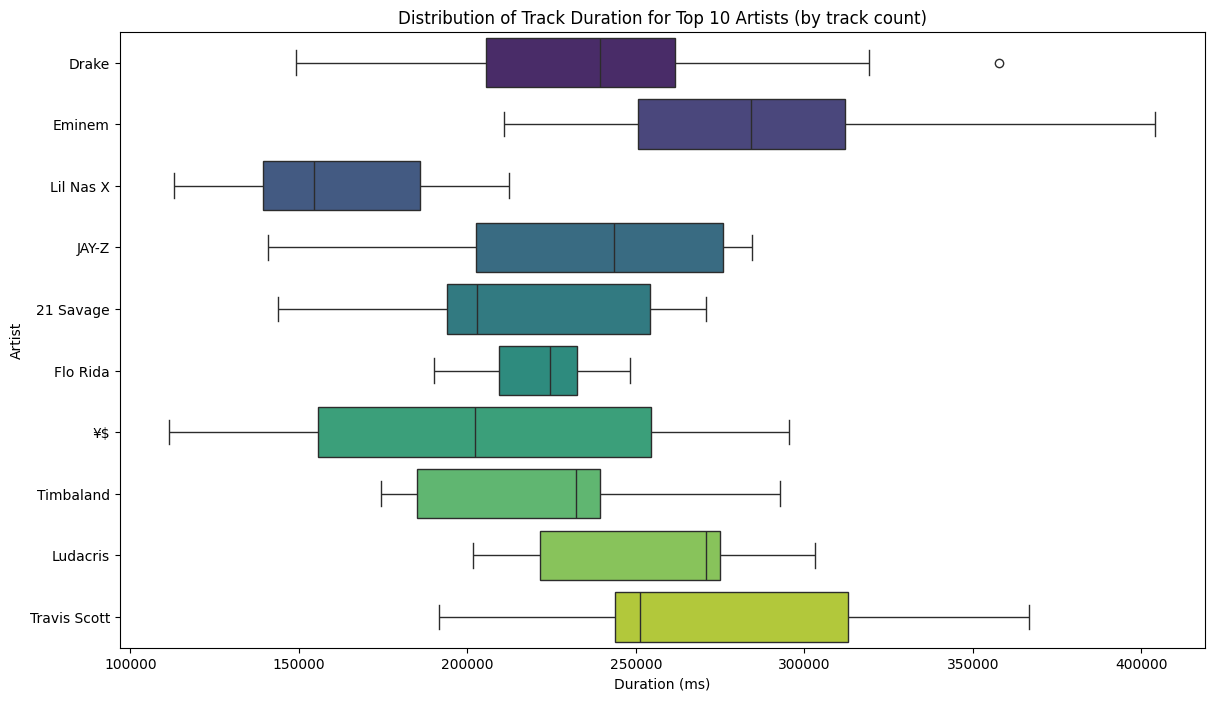

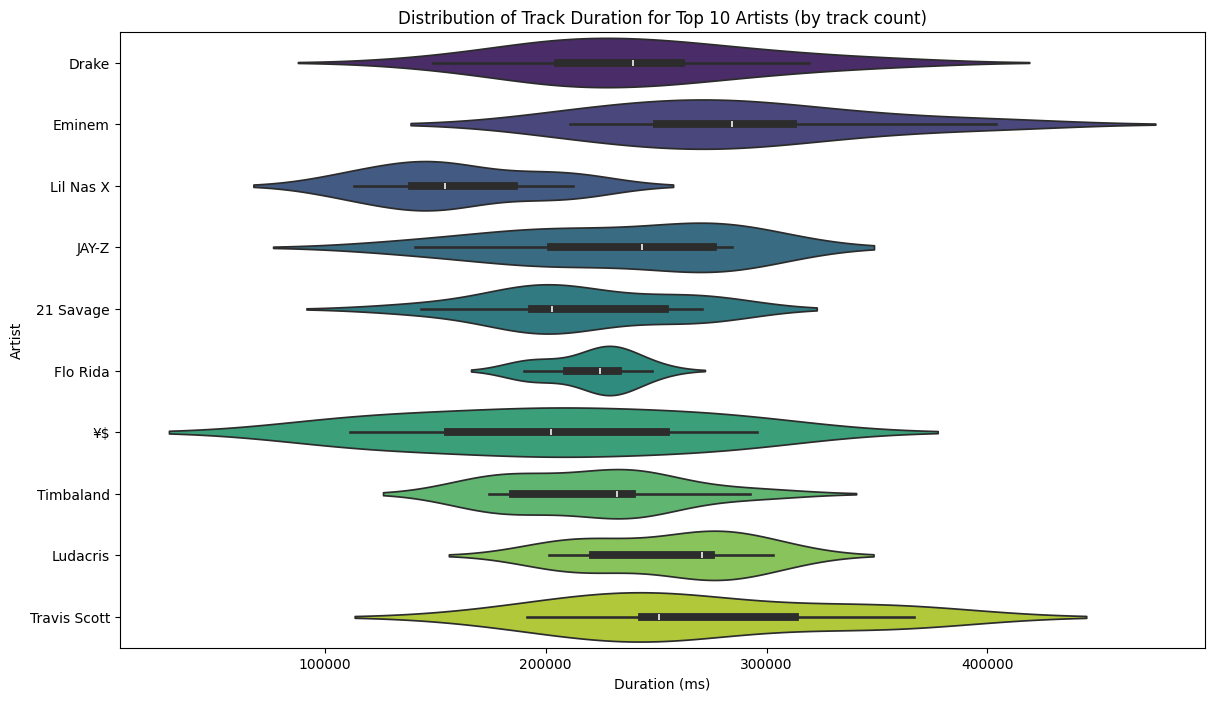

In [38]:
top_10_artists_by_track_count = artist_counts.head(10).index

# Filter the dataframe to include only tracks by these top 10 artists
df_top_10_artists = df[df['Artist'].isin(top_10_artists_by_track_count)]

# Create a box plot to visualize the distribution of 'Duration (ms)' for these artists
plt.figure(figsize=(14, 8)) # Adjust figure size for better readability
sns.boxplot(x='Duration (ms)', y='Artist', data=df_top_10_artists, order=top_10_artists_by_track_count, palette='viridis')
plt.title('Distribution of Track Duration for Top 10 Artists (by track count)')
plt.xlabel('Duration (ms)')
plt.ylabel('Artist')
plt.show()

plt.figure(figsize=(14, 8))
sns.violinplot(x='Duration (ms)', y='Artist', data=df_top_10_artists, order=top_10_artists_by_track_count, palette='viridis')
plt.title('Distribution of Track Duration for Top 10 Artists (by track count)')
plt.xlabel('Duration (ms)')
plt.ylabel('Artist')
plt.show()